<a href="https://colab.research.google.com/github/4L4st0r-K41s3r/challenge-Alurastore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import pandas as pd

df = pd.concat([tienda, tienda2, tienda3, tienda4])

df.reset_index(drop=True, inplace=True)

print(f"Total de datos cargados: {len(df)} filas")
df.head()

Total de datos cargados: 9435 filas


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
ingresos_por_tienda = df.groupby('Lugar de Compra')['Precio'].sum()

print(ingresos_por_tienda)

Lugar de Compra
Armenia          1.224290e+07
Barranquilla     1.320405e+08
Bogotá           1.814858e+09
Bucaramanga      9.057330e+07
Cali             5.065261e+08
Cartagena        1.023767e+08
Cúcuta           9.936910e+07
Inírida          8.087900e+06
Leticia          6.714990e+07
Manizales        1.936790e+07
Medellín         1.096669e+09
Neiva            2.089800e+07
Pasto            4.901430e+07
Pereira          2.259273e+08
Riohacha         7.387970e+07
Santa Marta      5.310050e+07
Soacha           1.231770e+07
Valledupar       5.886300e+06
Villavicencio    1.333360e+07
Name: Precio, dtype: float64


# 2. Ventas por categoría

In [ ]:
# 1. Agrupar por Lugar y Categoría, y contar las ventas (filas)
ventas_por_categoria = df.groupby(['Lugar de Compra', 'Categoría del Producto']).size().reset_index(name='Cantidad')

# 2. Ordenar para ver los más vendidos primero en cada ciudad
ventas_populares = ventas_por_categoria.sort_values(by=['Lugar de Compra', 'Cantidad'], ascending=[True, False])


In [ ]:
# Mostrar el resultado
print(ventas_populares)

    Lugar de Compra   Categoría del Producto  Cantidad
3           Armenia             Electrónicos         7
5           Armenia                 Juguetes         7
7           Armenia                  Muebles         5
0           Armenia  Artículos para el hogar         3
2           Armenia        Electrodomésticos         2
..              ...                      ...       ...
142   Villavicencio             Electrónicos         4
143   Villavicencio   Instrumentos musicales         3
144   Villavicencio                 Juguetes         3
139   Villavicencio  Artículos para el hogar         1
145   Villavicencio                   Libros         1

[147 rows x 3 columns]


# 3. Calificación promedio de la tienda


In [ ]:
# Agrupar por 'Lugar de Compra' y calcular el promedio de 'Calificación'
calificacion_promedio = df.groupby('Lugar de Compra')['Calificación'].mean().reset_index()

# Opcional: Redondear a 2 decimales para que se vea más ordenado
calificacion_promedio['Calificación'] = calificacion_promedio['Calificación'].round(2)

In [ ]:
# Mostrar el resultado
print(calificacion_promedio)

   Lugar de Compra  Calificación
0          Armenia          3.46
1     Barranquilla          3.80
2           Bogotá          4.11
3      Bucaramanga          3.98
4             Cali          4.05
5        Cartagena          4.02
6           Cúcuta          3.94
7          Inírida          3.64
8          Leticia          3.92
9        Manizales          3.63
10        Medellín          3.93
11           Neiva          3.80
12           Pasto          4.15
13         Pereira          4.01
14        Riohacha          3.90
15     Santa Marta          3.60
16          Soacha          3.89
17      Valledupar          4.07
18   Villavicencio          3.83


# 4. Productos más y menos vendidos

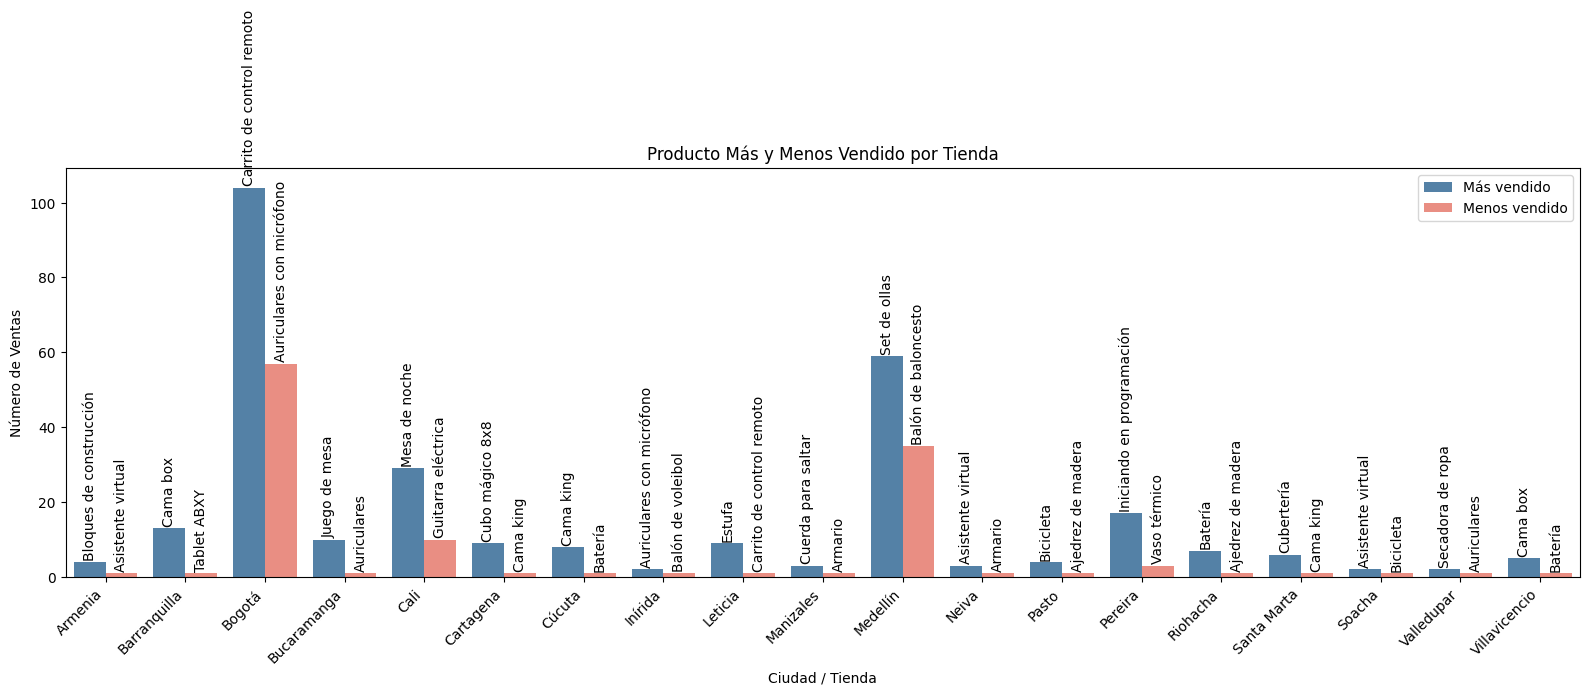

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar ventas por ciudad y producto
ventas = df.groupby(['Lugar de Compra', 'Producto']).size().reset_index(name='Cantidad')

# Obtener el más vendido y menos vendido por ciudad
mas_vendido = ventas.loc[ventas.groupby('Lugar de Compra')['Cantidad'].idxmax()]
mas_vendido['Tipo'] = 'Más vendido'

menos_vendido = ventas.loc[ventas.groupby('Lugar de Compra')['Cantidad'].idxmin()]
menos_vendido['Tipo'] = 'Menos vendido'

# Unir ambos
resumen = pd.concat([mas_vendido, menos_vendido])

# Gráfico
plt.figure(figsize=(16, 7))
sns.barplot(
    data=resumen,
    x='Lugar de Compra',
    y='Cantidad',
    hue='Tipo',
    palette={'Más vendido': 'steelblue', 'Menos vendido': 'salmon'}
)

# Agregar etiquetas con el nombre del producto encima de cada barra
ax = plt.gca()
for bar, (_, row) in zip(ax.patches, resumen.iterrows()):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        row['Producto'],
        ha='center', va='bottom',
        fontsize=10, rotation=90
    )

plt.title('Producto Más y Menos Vendido por Tienda')
plt.xlabel('Ciudad / Tienda')
plt.ylabel('Número de Ventas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Recrear datos_extremos
conteo_ventas = df.groupby(['Lugar de Compra', 'Producto']).size().reset_index(name='Ventas')

indices_max = conteo_ventas.groupby('Lugar de Compra')['Ventas'].idxmax()
indices_min = conteo_ventas.groupby('Lugar de Compra')['Ventas'].idxmin()

top_productos = conteo_ventas.loc[indices_max].copy()
top_productos['Etiqueta'] = 'Más Vendido'

low_productos = conteo_ventas.loc[indices_min].copy()
low_productos['Etiqueta'] = 'Menos Vendido'

datos_extremos = pd.concat([top_productos, low_productos])

# Tabla pivot
tabla_pivot = datos_extremos.pivot_table(
    index='Lugar de Compra',
    columns='Etiqueta',
    values=['Producto', 'Ventas'],
    aggfunc='first'
)

tabla_pivot.columns = ['Producto Menos Vendido', 'Producto Más Vendido', 'Ventas Menos', 'Ventas Más']
tabla_pivot = tabla_pivot[['Producto Más Vendido', 'Ventas Más', 'Producto Menos Vendido', 'Ventas Menos']]
tabla_pivot.columns.name = None

print("=" * 85)
print("        PRODUCTO MÁS Y MENOS VENDIDO POR TIENDA")
print("=" * 85)
print(tabla_pivot.to_string())
print("=" * 85)

        PRODUCTO MÁS Y MENOS VENDIDO POR TIENDA
                      Producto Más Vendido  Ventas Más     Producto Menos Vendido  Ventas Menos
Lugar de Compra                                                                                
Armenia            Bloques de construcción           4          Asistente virtual             1
Barranquilla                      Cama box          13                Tablet ABXY             1
Bogotá           Carrito de control remoto         104  Auriculares con micrófono            57
Bucaramanga                  Juego de mesa          10                Auriculares             1
Cali                         Mesa de noche          29         Guitarra eléctrica            10
Cartagena                  Cubo mágico 8x8           9                  Cama king             1
Cúcuta                           Cama king           8                    Batería             1
Inírida          Auriculares con micrófono           2          Balón de voleibol       

# 5. Envío promedio por tienda

In [ ]:
# Agrupar por 'Lugar de Compra' y calcular el promedio del 'Costo de envío'
costo_envio_promedio = df.groupby('Lugar de Compra')['Costo de envío'].mean().reset_index()

# Opcional: Redondear a 2 decimales para facilitar la lectura
costo_envio_promedio['Costo de envío'] = costo_envio_promedio['Costo de envío'].round(2)

In [ ]:
# Mostrar el resultado
print(costo_envio_promedio)

   Lugar de Compra  Costo de envío
0          Armenia        22867.86
1     Barranquilla        22692.26
2           Bogotá        24532.08
3      Bucaramanga        26790.06
4             Cali        26726.81
5        Cartagena        22638.43
6           Cúcuta        28597.31
7          Inírida        30557.14
8          Leticia        25317.61
9        Manizales        24948.78
10        Medellín        25282.02
11           Neiva        27710.00
12           Pasto        27801.06
13         Pereira        23211.41
14        Riohacha        24127.61
15     Santa Marta        18752.32
16          Soacha        34768.42
17      Valledupar        22021.43
18   Villavicencio        25100.00


# 6. Tabla de datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración estética opcional
sns.set_theme(style="whitegrid") # Fondo de cuadrícula suave

/tmp/ipython-input-2364519537.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico1 = sns.barplot(x=ingresos.index, y=ingresos.values, palette="viridis")


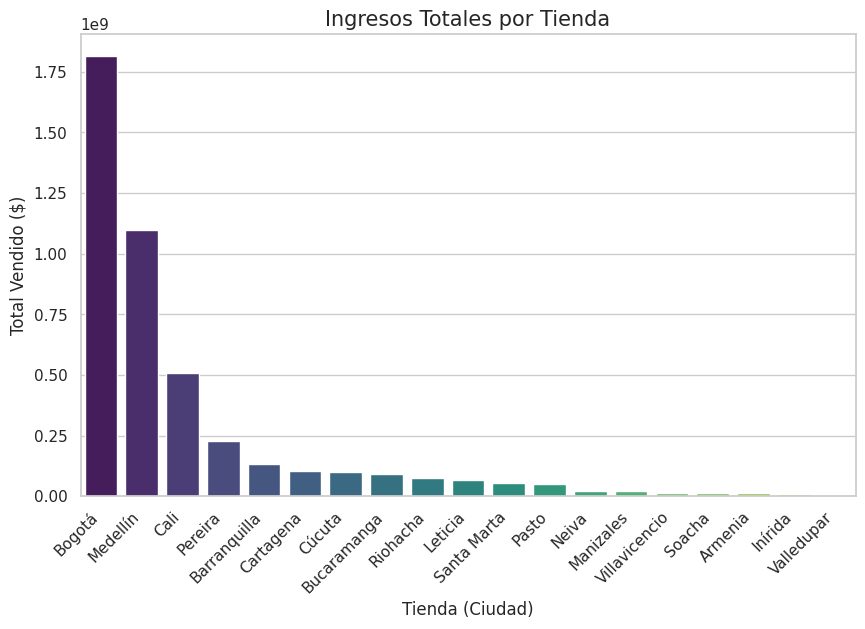

In [ ]:
# 1. Preparar datos
ingresos = df.groupby('Lugar de Compra')['Precio'].sum().sort_values(ascending=False)

# 2. Crear gráfico
plt.figure(figsize=(10, 6))
grafico1 = sns.barplot(x=ingresos.index, y=ingresos.values, palette="viridis")

# 3. Etiquetas y Títulos
plt.title('Ingresos Totales por Tienda', fontsize=15)
plt.xlabel('Tienda (Ciudad)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Vendido ($)')
plt.show()

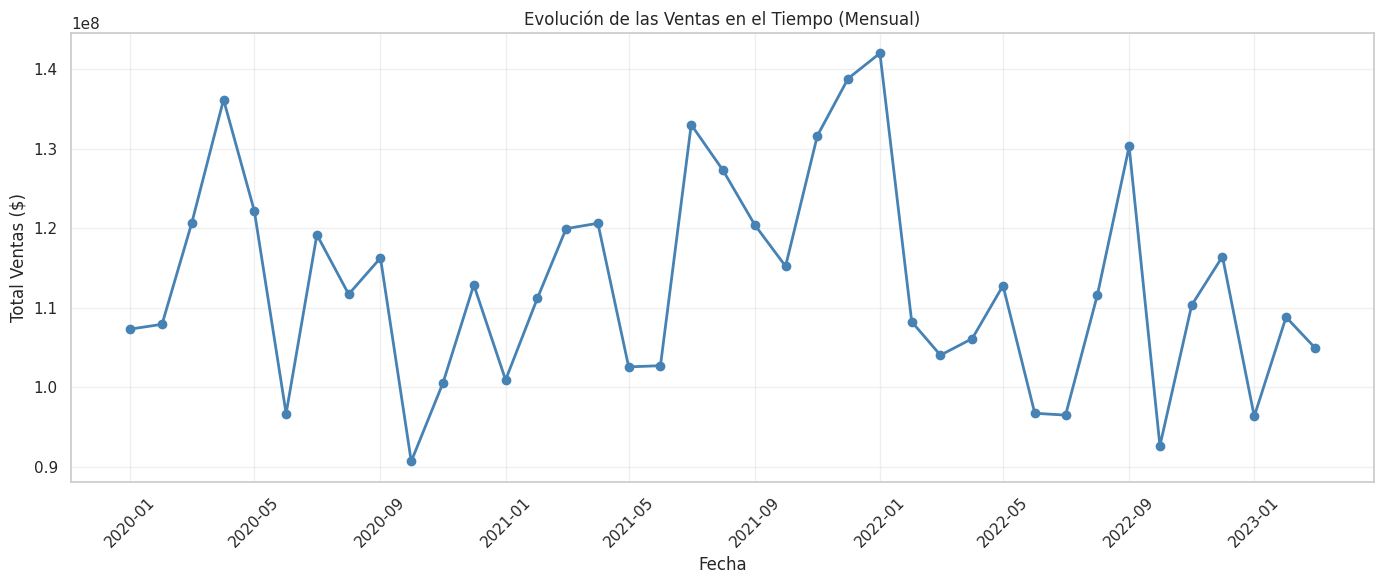

In [ ]:
import matplotlib.pyplot as plt

df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True)

# Agrupar por mes y sumar el total de ventas
ventas_mensuales = df.groupby(df['Fecha de Compra'].dt.to_period('M'))['Precio'].sum().reset_index()
ventas_mensuales['Fecha de Compra'] = ventas_mensuales['Fecha de Compra'].dt.to_timestamp()

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(ventas_mensuales['Fecha de Compra'], ventas_mensuales['Precio'], marker='o', linewidth=2, color='steelblue')
plt.title('Evolución de las Ventas en el Tiempo (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Total Ventas ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2248615190.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=envio_prop, x='% Envío sobre Precio', y='Categoría del Producto', palette='coolwarm')


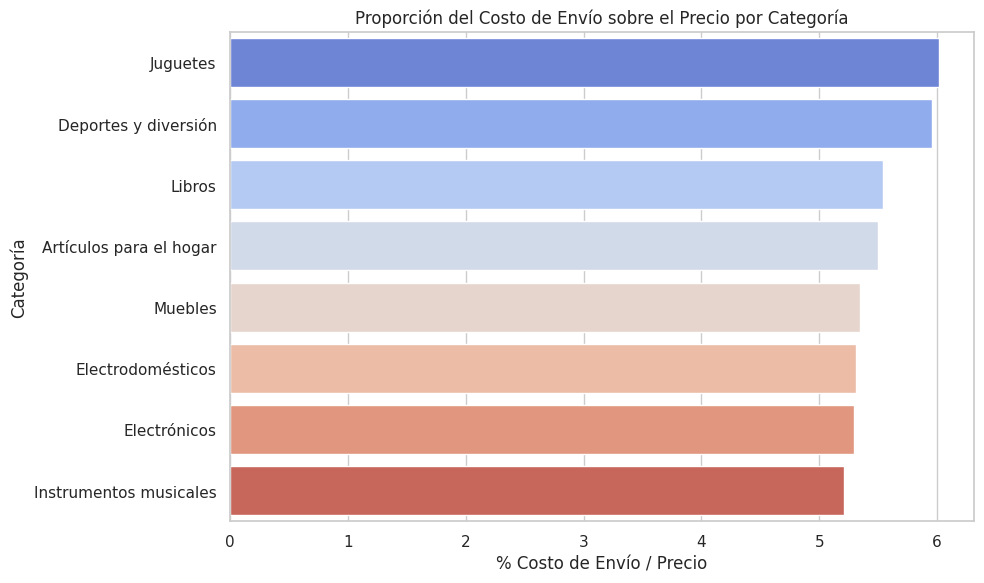

In [ ]:
df['% Envío sobre Precio'] = (df['Costo de envío'] / df['Precio']) * 100

envio_prop = df.groupby('Categoría del Producto')['% Envío sobre Precio'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=envio_prop, x='% Envío sobre Precio', y='Categoría del Producto', palette='coolwarm')
plt.title('Proporción del Costo de Envío sobre el Precio por Categoría')
plt.xlabel('% Costo de Envío / Precio')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

# Informe Final

In [ ]:
import pandas as pd

# 1. Ingresos por tienda
ingresos_tienda = df.groupby('Lugar de Compra')['Precio'].sum()
tienda_mayor = ingresos_tienda.idxmax()
tienda_menor = ingresos_tienda.idxmin()

# Producto más vendido en la tienda con mayores ingresos
prod_estrella = df[df['Lugar de Compra'] == tienda_mayor]['Producto'].value_counts().idxmax()
cat_estrella = df[df['Lugar de Compra'] == tienda_mayor]['Categoría del Producto'].value_counts().idxmax()

# 2. Calificaciones por tienda
calif_tienda = df.groupby('Lugar de Compra')['Calificación'].mean()
tienda_mejor_calif = calif_tienda.idxmax()
tienda_peor_calif = calif_tienda.idxmin()

# 3. Costo de envío promedio más alto por tienda
envio_tienda = df.groupby('Lugar de Compra')['Costo de envío'].mean()
tienda_mayor_envio = envio_tienda.idxmax()

# 4. Categorías globales
cat_mas_vendida = df['Categoría del Producto'].value_counts().idxmax()
cat_menos_vendida = df['Categoría del Producto'].value_counts().idxmin()

# 5. Tienda con ingresos Y calificación más bajos combinados
# Normalizamos ambos y sumamos
ingresos_norm = (ingresos_tienda - ingresos_tienda.min()) / (ingresos_tienda.max() - ingresos_tienda.min())
calif_norm = (calif_tienda - calif_tienda.min()) / (calif_tienda.max() - calif_tienda.min())
peor_combinado = (ingresos_norm + calif_norm).idxmin()

# REPORTE
print("=" * 55)
print("        RESUMEN GENERAL DE TIENDAS")
print("=" * 55)

print(f"  TIENDA CON MAYORES INGRESOS: {tienda_mayor}")
print(f"  Ingresos totales : ${ingresos_tienda[tienda_mayor]:,.0f}")
print(f"  Producto estrella: {prod_estrella}")
print(f"    Categoría líder  : {cat_estrella}")

print(f"\n TIENDA CON MENORES INGRESOS: {tienda_menor}")
print(f"    Ingresos totales : ${ingresos_tienda[tienda_menor]:,.0f}")

print(f"\n MEJOR VALORADA: {tienda_mejor_calif}")
print(f"   Puntuación promedio: {calif_tienda[tienda_mejor_calif]:.2f} / 5")

print(f"\n PEOR VALORADA: {tienda_peor_calif}")
print(f"   Puntuación promedio: {calif_tienda[tienda_peor_calif]:.2f} / 5")

print(f"\n MAYOR COSTO DE ENVÍO PROMEDIO: {tienda_mayor_envio}")
print(f"   Costo promedio: ${envio_tienda[tienda_mayor_envio]:,.0f}")

print(f"\n CATEGORÍA MÁS VENDIDA (global) : {cat_mas_vendida}")
print(f"   Unidades: {df['Categoría del Producto'].value_counts()[cat_mas_vendida]:,}")

print(f"\n CATEGORÍA MENOS VENDIDA (global): {cat_menos_vendida}")
print(f"   Unidades: {df['Categoría del Producto'].value_counts()[cat_menos_vendida]:,}")

print(f"\n  TIENDA CON PEORES INGRESOS Y CALIFICACIÓN: {peor_combinado}")
print(f"    Ingresos   : ${ingresos_tienda[peor_combinado]:,.0f}")
print(f"    Calificación: {calif_tienda[peor_combinado]:.2f} / 5")

print("\n" + "=" * 55)

        RESUMEN GENERAL DE TIENDAS
  TIENDA CON MAYORES INGRESOS: Bogotá
  Ingresos totales : $1,814,858,300
  Producto estrella: Carrito de control remoto
    Categoría líder  : Muebles

 TIENDA CON MENORES INGRESOS: Valledupar
    Ingresos totales : $5,886,300

 MEJOR VALORADA: Pasto
   Puntuación promedio: 4.15 / 5

 PEOR VALORADA: Armenia
   Puntuación promedio: 3.46 / 5

 MAYOR COSTO DE ENVÍO PROMEDIO: Soacha
   Costo promedio: $34,768

 CATEGORÍA MÁS VENDIDA (global) : Muebles
   Unidades: 1,886

 CATEGORÍA MENOS VENDIDA (global): Artículos para el hogar
   Unidades: 730

  TIENDA CON PEORES INGRESOS Y CALIFICACIÓN: Armenia
    Ingresos   : $12,242,900
    Calificación: 3.46 / 5



## 1. Introducción  
El objetivo del presente informe es analizar el rendimiento operativo y comercial de las distintas tiendas bajo la gestión del Sr. Juan. A través del procesamiento de datos de ventas, se han evaluado métricas como ingresos totales, satisfacción del cliente, costos logísticos y preferencias de productos. Este análisis busca proporcionar una base para tomar una decisión estratégica sobre qué tienda debería ser o cerrada para optimizar la rentabilidad del negocio.

## 2. Desarrollo y Análisis de Datos
A continuación, se presentan los hallazgos más relevantes derivados del análisis de datos y las visualizaciones generadas:

### A. Ingresos Totales por Tienda
El análisis financiero revela disparidades en la generación de ingresos entre las distintas ubicaciones.

Tienda con mayores ingresos: Bogotá se posiciona como líder en facturación, impulsada principalmente por la venta de Carrito de control remoto

Tienda con menores ingresos: Valledupar muestra el desempeño más bajo en términos monetarios.

### B. Satisfacción del Cliente (Calificaciones)
La reputación de la marca varía significativamente por ubicación geográfica.

Mejor valorada: La tienda de Pasto mantiene un promedio de 4.15 estrellas, indicando una alta fidelidad y satisfacción.

Peor valorada: La tienda de Armenia presenta un promedio crítico de 3.46 estrellas. Esto sugiere problemas graves en la atención al cliente o la calidad del producto entregado.

### C. Costos de Envío y Logística
Se analizó el impacto de los costos de envío promedio, un factor determinante en la decisión de compra del cliente.

La tienda de Soacha tiene el costo de envío promedio más alto ($34,768), lo cual puede estar actuando como una barrera de entrada para nuevos clientes.

### D. Productos y Categorías
Lo más vendido: La categoría muebles domina las ventas globales.

Lo menos vendido: Los productos de la categoría Articulos para el hogar tienen una rotación mínima.

## 3. Conclusión y Recomendación Estratégica
Basado en la integración de todas las variables analizadas (Ingresos, Calificación, Logística), la recomendación para el Sr. Juan es proceder con la venta / cierre de la tienda de:

### Armenia
###Justificación de la decisión:
Esta recomendación se sustenta en los siguientes puntos críticos:

Desempeño Financiero: Esta tienda representa el flujo de ingresos más bajo del grupo.

Con una calificación promedio de 3.46, esta sucursal está dañando la imagen general de la marca. Recuperar la confianza del cliente en esta zona requeriría una inversión desproporcionada.